<a href="https://colab.research.google.com/github/Durgesh1231/-PCA_Assignment_1/blob/main/testTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Test/model (1).h5')  # Replace with your model path
le = pickle.load(open("/content/drive/MyDrive/Test/Label_encoder (1).pkl",'rb'))


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
le = LabelEncoder()
le.classes_ = np.array(['Normal', 'Tuberculosis'])  # Replace with your actual class names


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detection_system(image_path, model, label_encoder, image_size=150):
    """
    Detect TB in an X-ray image and visualize prediction.

    Parameters:
    - image_path: Path to the X-ray image.
    - model: Trained Keras model.
    - label_encoder: LabelEncoder instance for decoding predictions.
    - image_size: Image size for model input.

    Returns:
    - predicted_label: Class label (e.g., TB or Normal).
    - confidence_score: Prediction confidence.
    """

    # Load and validate image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (image_size, image_size))
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)

    # Model prediction
    predictions = model.predict(image_input)
    predicted_index = np.argmax(predictions)
    confidence_score = predictions[0][predicted_index]
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    # ---------- OPTIONAL TB REGION VISUALIZATION ----------
    # If your model outputs segmentation or activation maps, include them here
    # For now, we simulate a dummy mask for bounding box demo (remove in real case)
    dummy_mask = np.zeros((image_size, image_size), dtype='uint8')
    if predicted_label.lower() == "tb":  # Simulate TB region for demo
        cv2.rectangle(dummy_mask, (40, 40), (110, 110), 1, -1)  # a white square

    # Process and draw bounding box if TB is detected
    if predicted_label.lower() == "tb":
        contours, _ = cv2.findContours(dummy_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        image_with_box = image_resized.copy()

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image_with_box, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)
            underline_y = y + h - 5
            cv2.line(image_with_box, (x + 5, underline_y), (x + w - 5, underline_y), color=(255, 0, 0), thickness=2)
    else:
        image_with_box = image_resized

    # Show the result
    plt.figure(figsize=(6, 6))
    plt.imshow(image_with_box)
    plt.title(f"Predicted: {predicted_label}, Confidence: {confidence_score*100:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence_score


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


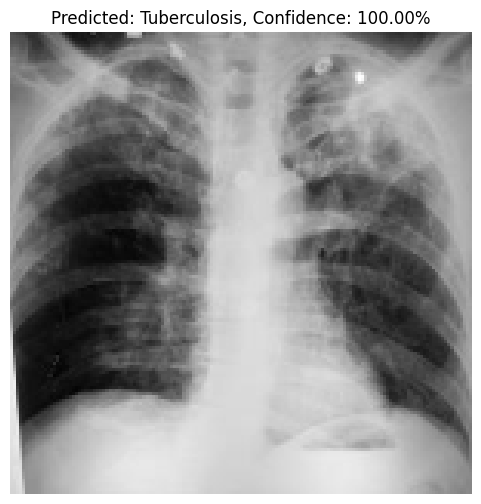

Predicted Label: Tuberculosis, Confidence Score: 100.00%


In [ ]:
image_path = "/content/drive/MyDrive/Test/X-ray/X-rayTuberculosis/Tuberculosis-701 (3455).jpg"  # Replace with the path to your image
predicted_label, confidence_score = detection_system(image_path, model, le)
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")

In [ ]:
-
def visualize_tb_prediction(image_path, prediction, save_path=None):
    """
    Draws an underline under the predicted TB region on the X-ray image.

    Args:
        image_path (str): Path to the image file.
        prediction (dict): Must contain 'bbox': [x, y, w, h]
        save_path (str, optional): Path to save the resulting image. If None, shows image.
    """
    import cv2
    import matplotlib.pyplot as plt

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Cannot read image at {image_path}")

    if 'bbox' in prediction:
        x, y, w, h = prediction['bbox']
        underline_y = y + h + 10
        cv2.line(img, (x, underline_y), (x + w, underline_y), (0, 0, 255), 2)  # Red line

    if save_path:
        cv2.imwrite(save_path, img)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("TB Region Underlined")
        plt.axis('off')
        plt.show()










In [ ]:
def mask_to_bbox(mask_tensor):
    """Converts a binary mask to a bounding box: [x, y, w, h]"""
    import torch
    ys, xs = torch.where(mask_tensor > 0)
    if len(xs) == 0 or len(ys) == 0:
        return None
    x_min, y_min = xs.min().item(), ys.min().item()
    x_max, y_max = xs.max().item(), ys.max().item()
    return [x_min, y_min, x_max - x_min, y_max - y_min]


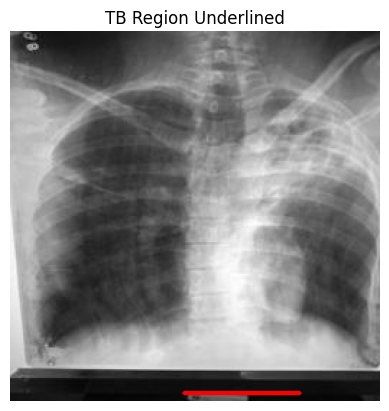

In [ ]:
image_path = "/content/drive/MyDrive/ TBB/TB.2.jpg"  # Your actual image path

# Example 1: If you already have a predicted bbox
prediction = {'bbox': [120, 140, 80, 100]}  # Replace with your actual bbox

# Example 2: If you get a mask from the model
# mask = model_output  # binary torch tensor
# bbox = mask_to_bbox(mask)
# prediction = {'bbox': bbox}

visualize_tb_prediction(image_path, prediction)


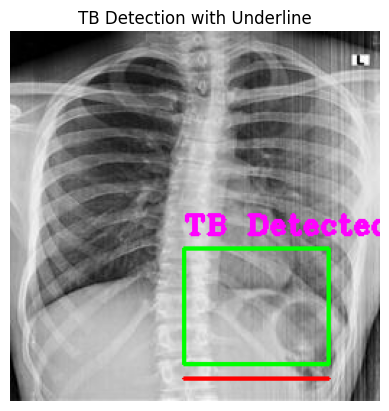

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the X-ray image
image_path = "/content/drive/MyDrive/tb/others (1).jpg"  # Replace with your X-ray image path
img = cv2.imread(image_path)

# Simulated TB prediction from your model (bounding box format: x, y, w, h)
# In practice, get this from your model or from mask_to_bbox()
tb_prediction = {'bbox': [120, 150, 100, 80]}  # Replace this with real prediction

# Draw bounding box and underline
if 'bbox' in tb_prediction:
    x, y, w, h = tb_prediction['bbox']

    # Rectangle around TB region
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Label above the box
    cv2.putText(img, "TB Detected", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 255), 2)

    # Red underline under the TB region
    underline_y = y + h + 10
    cv2.line(img, (x, underline_y), (x + w, underline_y), (0, 0, 255), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("TB Detection with Underline")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def detection_system_3d(image_path, model, label_encoder, image_size=150, slices=30):
    """
    TB detection with 3D visualization using a simulated volume stack.

    Parameters:
    - image_path: Path to the X-ray image.
    - model: Trained Keras model.
    - label_encoder: Label encoder used during training.
    - image_size: Size to resize image to (default: 150x150).
    - slices: Number of layers in the fake 3D volume.

    Returns:
    - predicted_label: The predicted class.
    - confidence_score: Model's confidence.
    """
    # Load and preprocess image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (image_size, image_size))
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)

    # Predict class
    predictions = model.predict(image_input)
    predicted_index = np.argmax(predictions)
    confidence_score = predictions[0][predicted_index]
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    # Create a 3D volume by stacking grayscale slices
    volume = np.stack([image_gray * confidence_score for _ in range(slices)], axis=0)

    # Prepare 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Coordinates
    z, y, x = volume.nonzero()
    c = volume[z, y, x] / 255.0  # normalize colors for plotting

    ax.scatter(x, y, z, c=c, cmap='hot', alpha=0.6, s=2)
    ax.set_title(f"3D TB Visualization\nPrediction: {predicted_label} ({confidence_score*100:.2f}%)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')

    plt.tight_layout()
    plt.show()

    return predicted_label, confidence_score


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


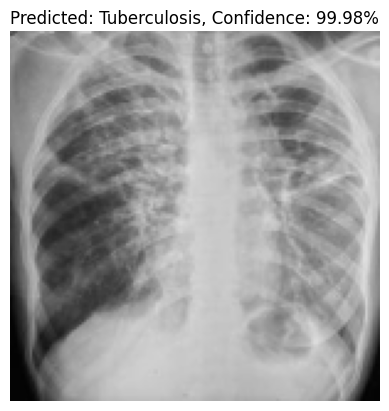

Predicted Label: Tuberculosis, Confidence Score: 99.98%


In [ ]:
image_path = "/content/drive/MyDrive/ TBB/TB.3.png"  # Replace with the path to your image
predicted_label, confidence_score = detection_system(image_path, model, le)
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")